# Library

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib import cm
plt.style.use('ggplot')
import seaborn as sns

import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalMaxPooling2D,Dense,Input,Conv2D,Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam

In [9]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import visual,describe,deep_learning

%reload_ext autoreload

# Load dataset

In [3]:
data_path = f'E:/gitlab/machine-learning/dataset/imagenette2/'
label_list = os.listdir(data_path)
print(label_list)

['cassette_player', 'chain_saw', 'church', 'english_springer', 'french_horn', 'garbage_truck', 'gas_pump', 'golf_ball', 'parachute', 'tench']


## splited data

In [4]:
deep_learning.split_dataset_image(f'E:/gitlab/machine-learning/dataset/imagenette2/')

Copying files: 13394 files [05:11, 43.01 files/s]


## Load train and val dataset

In [4]:
data_path = f'E:/gitlab/machine-learning/dataset/imagenette2/split/'
label_list = os.listdir(data_path+'/train')
print(label_list)

['cassette_player', 'chain_saw', 'church', 'english_springer', 'french_horn', 'garbage_truck', 'gas_pump', 'golf_ball', 'parachute', 'tench']


## total image

In [5]:
train = []
val = []
for i in label_list:
    train.append(len(os.listdir(data_path+'/train/'+i)))
    val.append(len(os.listdir(data_path+'/val/'+i)))
print(f'Total image is {sum(train)+sum(val)}')
print(f'Total image at train is {sum(train)}')
print(f'Total image at val is {sum(val)}')

Total image is 13394
Total image at train is 10715
Total image at val is 2679


## Image resolution

In [6]:
dim1 = []
dim2 = []
for image_filename in os.listdir(data_path+'/train/'+label_list[0]):
    img = imread(data_path+'/train/'+label_list[0]+'/'+image_filename)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

print(f'average resolution image are {np.round(np.mean(dim1),0)} x {np.round(np.mean(dim2),0)}')

average resolution image are 314.0 x 396.0


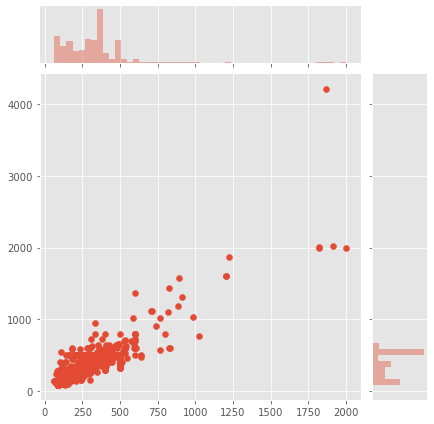

In [8]:
sns.jointplot(dim1,dim2)

In [7]:
train_cassette_player = os.path.join(data_path + 'train/cassette_player')
train_chain_saw = os.path.join(data_path + 'train/chain_saw')
train_church = os.path.join(data_path + 'train/church')
train_english_springer = os.path.join(data_path + 'train/english_springer')
train_french_horn = os.path.join(data_path + 'train/french_horn')
train_garbage_truck = os.path.join(data_path + 'train/garbage_truck')
train_gas_pump = os.path.join(data_path + 'train/gas_pump')
train_golf_ball = os.path.join(data_path + 'train/golf_ball')
train_parachute = os.path.join(data_path + 'train/parachute')
train_tench = os.path.join(data_path + 'train/tench')

# Visual

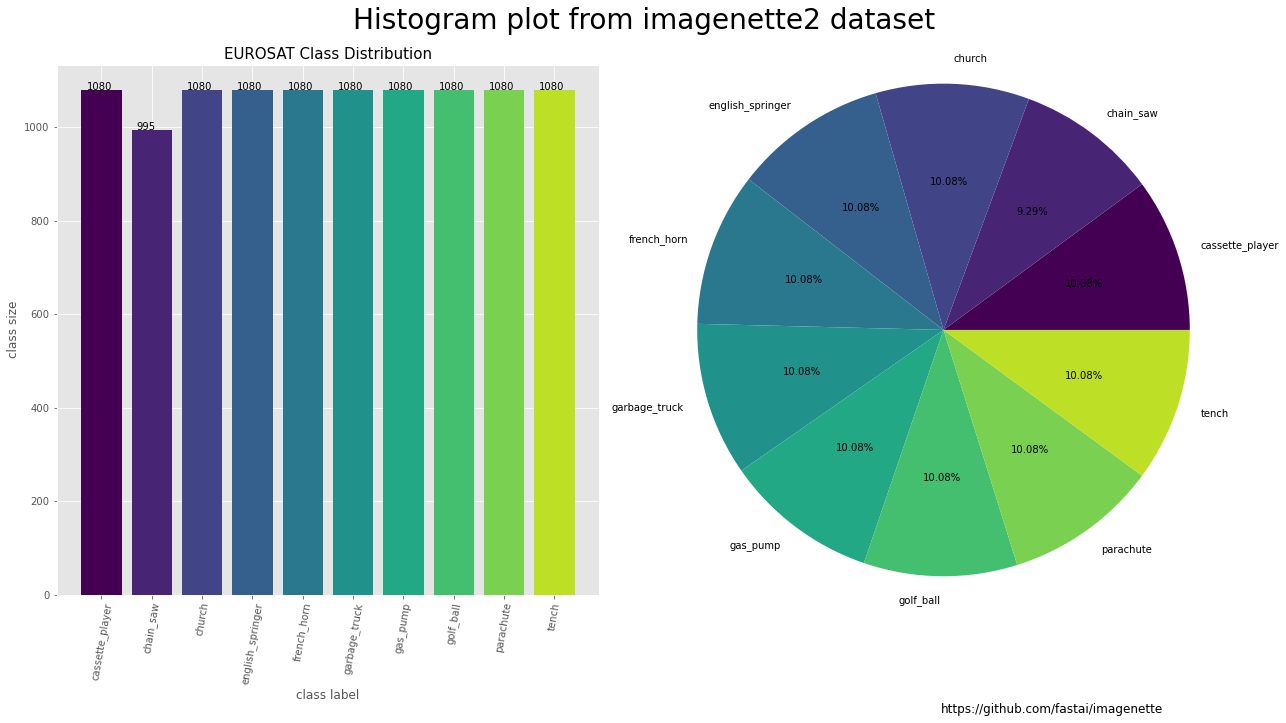

In [10]:
deep_learning.bar_and_pie_plot_folder(data_path+'/train',label_list,'imagenette2','https://github.com/fastai/imagenette')

In [11]:
lists = [train_cassette_player,train_chain_saw,train_church,train_english_springer,
train_french_horn,train_garbage_truck,train_gas_pump,train_golf_ball,train_parachute,train_tench,
]

cassette_player
shape of 1 image is (500, 375, 3)
shape of 2 image is (375, 500, 3)
shape of 3 image is (375, 500, 3)


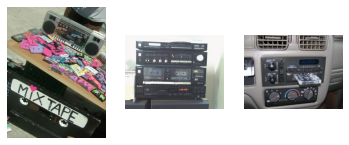

chain_saw
shape of 1 image is (500, 334, 3)
shape of 2 image is (333, 500, 3)
shape of 3 image is (409, 500, 3)


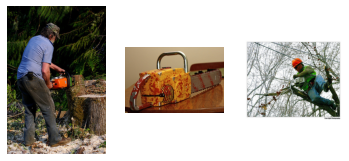

church
shape of 1 image is (492, 500)
shape of 2 image is (375, 500, 3)
shape of 3 image is (383, 500, 3)


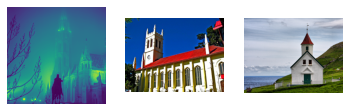

english_springer
shape of 1 image is (334, 500, 3)
shape of 2 image is (334, 500, 3)
shape of 3 image is (375, 500, 3)


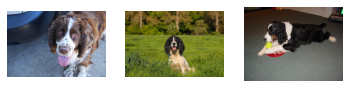

french_horn
shape of 1 image is (375, 500, 3)
shape of 2 image is (404, 500, 3)
shape of 3 image is (375, 500, 3)


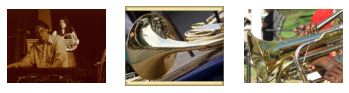

garbage_truck
shape of 1 image is (334, 500, 3)
shape of 2 image is (375, 500, 3)
shape of 3 image is (375, 500, 3)


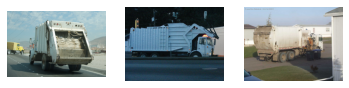

gas_pump
shape of 1 image is (500, 375, 3)
shape of 2 image is (500, 375, 3)
shape of 3 image is (375, 500, 3)


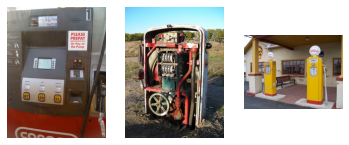

golf_ball
shape of 1 image is (357, 500, 3)
shape of 2 image is (375, 500, 3)
shape of 3 image is (399, 600, 3)


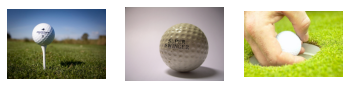

parachute
shape of 1 image is (375, 500, 3)
shape of 2 image is (500, 438, 3)
shape of 3 image is (375, 500, 3)


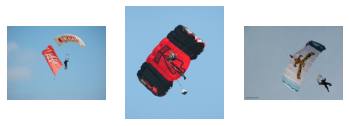

tench
shape of 1 image is (375, 500, 3)
shape of 2 image is (375, 500, 3)
shape of 3 image is (375, 500, 3)


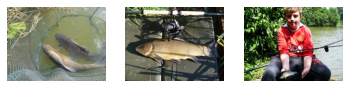

In [12]:
deep_learning.show_example(lists,label_list,n=3)

## Image Preprocessing

image Processing and Augmentation with ImageDataGenerator for spliting train and validation data. 

for this dataset we use ratio 80/20 for train dan validation data 

### Image Data Generator

In [13]:
idg = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,       
    height_shift_range=.2,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2)

### Spliting dataset

spliting dataset to train and validation data.

In [14]:
image_shape = (255,255,3)
num_class = 10
fine_tune = 4

In [15]:
train_gen = idg.flow_from_directory(
        data_path+'/train/',
        target_size=(image_shape[0], image_shape[1]),
        batch_size=64
        )

val_gen = idg.flow_from_directory(
        data_path+'/val/',
        target_size=(image_shape[0], image_shape[1]),
        batch_size=64
        )

Found 10715 images belonging to 10 classes.
Found 2679 images belonging to 10 classes.


# Model

In [16]:
model = Sequential([
    Input(shape=(image_shape[0], image_shape[1],3)),
    MobileNetV2(include_top=False, alpha=0.35, weights='imagenet', classes=num_class),
    GlobalMaxPooling2D(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_class, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_0.35_224 (Model) multiple                  410208    
_________________________________________________________________
global_max_pooling2d (Global (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 583,082
Trainable params: 569,002
Non-trainable params: 14,080
_____________________________________________

In [17]:
def callbacks():
    from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
    from tensorflow.keras.callbacks import LearningRateScheduler
    earlystopper = EarlyStopping(patience=12, verbose=1,monitor='val_accuracy')
    lr_reducer = ReduceLROnPlateau(monitor='val_accuracy',
                        factor=0.1,
                        cooldown=1,
                        verbose=1,
                        patience=5,
                        min_lr=0.5e-6,
                        mode='max')

    return([lr_reducer, earlystopper])

In [18]:
optimizer = Adam(lr=1.0000e-04)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=["accuracy"])

In [20]:
history = model.fit(
            train_gen,
            epochs=50,
            callbacks=callbacks(),
            validation_data=val_gen,
            verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 168 steps, validate for 42 steps
Epoch 1/50
168/168 [==============================] - 379s 2s/step - loss: 1.5325 - accuracy: 0.5594 - val_loss: 0.7946 - val_accuracy: 0.7495
Epoch 2/50
168/168 [==============================] - 223s 1s/step - loss: 0.6304 - accuracy: 0.8031 - val_loss: 0.6468 - val_accuracy: 0.8014
Epoch 3/50
168/168 [==============================] - 234s 1s/step - loss: 0.4913 - accuracy: 0.8525 - val_loss: 0.4584 - val_accuracy: 0.8537
Epoch 4/50
168/168 [==============================] - 244s 1s/step - loss: 0.4099 - accuracy: 0.8771 - val_loss: 0.4287 - val_accuracy: 0.8649
Epoch 5/50
168/168 [==============================] - 249s 1s/step - loss: 0.3587 - accuracy: 0.8895 - val_loss: 0.3815 - val_accuracy: 0.8888
Epoch 6/50
168/168 [==============================] - 293s 2s/step - loss: 0.3211 - accuracy: 0.9015 - val_loss: 0.3697 - val_accuracy: 0.8858
Epoch 7/50
168/168 [=============================

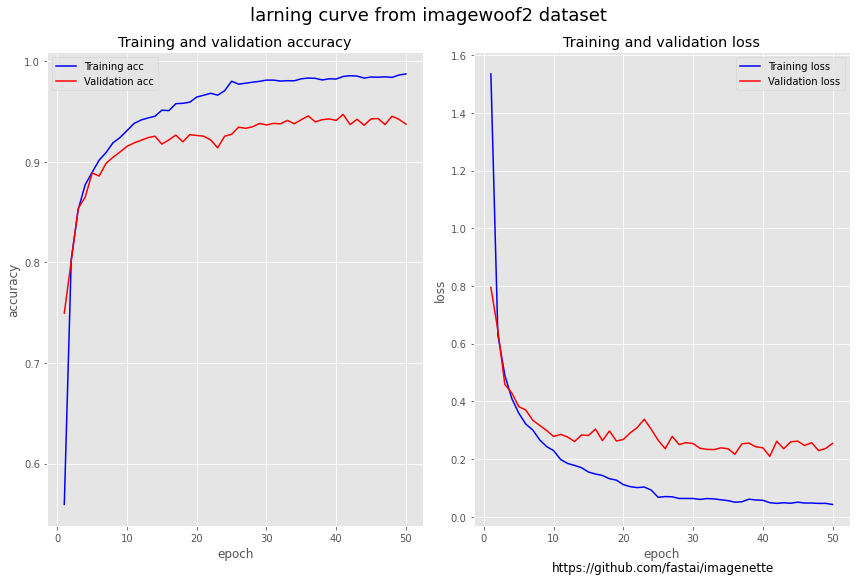

In [21]:
deep_learning.plot_nn(history,'imagewoof2',footnote="https://github.com/fastai/imagenette")

# save file to TFlite

In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()
open("converted_model_v1.tflite", "wb").write(tflite_model)

2277552

In [23]:
with tf.io.gfile.GFile('model_v1.tflite', 'wb') as f:
    f.write(tflite_model)